#importing data
the main purpose of this is to see which state and county had a more rapid growth in COVID-19 cases and since 2020 is the first year of covid outbreak, using this data to predict future growth and which regions the government should focus more on.


In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/refs/heads/master/us-counties-2020.csv')
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.0,2966,16.0
884733,2020-12-31,Teton,Wyoming,56039.0,2138,4.0
884734,2020-12-31,Uinta,Wyoming,56041.0,1558,7.0
884735,2020-12-31,Washakie,Wyoming,56043.0,780,19.0


#Cleaning the data

In [2]:
df.drop_duplicates()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.0,2966,16.0
884733,2020-12-31,Teton,Wyoming,56039.0,2138,4.0
884734,2020-12-31,Uinta,Wyoming,56041.0,1558,7.0
884735,2020-12-31,Washakie,Wyoming,56043.0,780,19.0


This step is to format the column labeled 'death', because it was presented as floats, which can be confusing of whether it is percentage or count. So this step is to fill in values that are NA to zero and convert all the numbers to integers


This sorts the data in alphabetical order for the states and the counties, and arrange the date and death toll in numerical order accordingly

In [3]:
df = df.sort_values(by=['state', 'deaths', 'date','county'])
df

,date,county,state,fips,cases,deaths
1619,2020-03-13,Elmore,Alabama,1051.0,1,0.0
1620,2020-03-13,Jefferson,Alabama,1073.0,2,0.0
1621,2020-03-13,Limestone,Alabama,1083.0,1,0.0
1622,2020-03-13,Montgomery,Alabama,1101.0,1,0.0
1623,2020-03-13,Tuscaloosa,Alabama,1125.0,1,0.0
...,...,...,...,...,...,...
871746,2020-12-27,Natrona,Wyoming,56025.0,6335,78.0
874991,2020-12-28,Natrona,Wyoming,56025.0,6381,88.0
878236,2020-12-29,Natrona,Wyoming,56025.0,6414,88.0
881481,2020-12-30,Natrona,Wyoming,56025.0,6443,88.0


In [4]:
missing_values = df.isna().sum()
print(missing_values)

date          0
county        0
state         0
fips       8266
cases         0
deaths    18761
dtype: int64


By filtering the data, we see that there are 8266 data points that have NaN for the fips value, which need to be taken into consideration when analyzing the data.

In [5]:
na_fips = df[df['fips'].isna()]
print("Rows with NaN in 'fips':")

# Display only the first 5 rows
print(na_fips.head())

# Display only the last 5 rows
print(na_fips.tail())

Rows with NaN in 'fips':
              date   county   state  fips  cases  deaths
26170   2020-04-02  Unknown  Alaska   NaN      1     0.0
40700   2020-04-08  Unknown  Alaska   NaN      1     0.0
190797  2020-05-30  Unknown  Alaska   NaN      1     0.0
193864  2020-05-31  Unknown  Alaska   NaN      1     0.0
196934  2020-06-01  Unknown  Alaska   NaN      1     0.0
              date   county      state  fips  cases  deaths
644590  2020-10-18  Unknown  Wisconsin   NaN      0    14.0
43197   2020-04-08  Unknown    Wyoming   NaN     30     0.0
45795   2020-04-09  Unknown    Wyoming   NaN      5     0.0
56455   2020-04-13  Unknown    Wyoming   NaN      1     0.0
59163   2020-04-14  Unknown    Wyoming   NaN      1     0.0


In order to make the data more consistent, we can manually replace the data that have a known county but a NaN fips

In [6]:
na_fips_non_unknown = df[df['fips'].isna() & (df['county'] != 'Unknown')]

# Group by 'county' and 'state', then count occurrences
summary = na_fips_non_unknown.groupby(['county', 'state']).size().reset_index(name='count')

# Display the summarized result
print(summary)

          county     state  count
0         Joplin  Missouri    190
1    Kansas City  Missouri    287
2  New York City  New York    306


In [7]:
# Replace NaN values for Joplin, Missouri with FIPS code 2937500
df.loc[(df['county'] == 'Joplin') & (df['state'] == 'Missouri'), 'fips'] = 2937500

# Replace NaN values for Kansas City, Missouri with FIPS code 2938000
df.loc[(df['county'] == 'Kansas City') & (df['state'] == 'Missouri'), 'fips'] = 2938000

# Replace NaN values for New York City, New York with FIPS code 36061
df.loc[(df['county'] == 'New York City') & (df['state'] == 'New York'), 'fips'] = 36061

print(df)

              date      county    state     fips  cases  deaths
1619    2020-03-13      Elmore  Alabama   1051.0      1     0.0
1620    2020-03-13   Jefferson  Alabama   1073.0      2     0.0
1621    2020-03-13   Limestone  Alabama   1083.0      1     0.0
1622    2020-03-13  Montgomery  Alabama   1101.0      1     0.0
1623    2020-03-13  Tuscaloosa  Alabama   1125.0      1     0.0
...            ...         ...      ...      ...    ...     ...
871746  2020-12-27     Natrona  Wyoming  56025.0   6335    78.0
874991  2020-12-28     Natrona  Wyoming  56025.0   6381    88.0
878236  2020-12-29     Natrona  Wyoming  56025.0   6414    88.0
881481  2020-12-30     Natrona  Wyoming  56025.0   6443    88.0
884726  2020-12-31     Natrona  Wyoming  56025.0   6479    92.0

[884737 rows x 6 columns]


In order to make predictions with modeling, I created a new column titled "fatality_rate" by diving the deaths column with the cases column.

In [8]:
import numpy as np
print(df['fips'].isna().sum())  # This will show the count of NaN values in the 'fips' column
df.fillna({'fips': 99999}, inplace=True) #replace NaN with a default value of 99999
df['fips'] = df['fips'].astype(int)
df['deaths'] = df['deaths'].fillna(0).astype(int)
df.reset_index(drop=True, inplace=True)
df['fatality_rate'] = df['deaths'] / df['cases'].replace(0, np.nan)
df['fatality_rate'] = df['fatality_rate'].round(3)
print(df)

7483
              date      county    state   fips  cases  deaths  fatality_rate
0       2020-03-13      Elmore  Alabama   1051      1       0          0.000
1       2020-03-13   Jefferson  Alabama   1073      2       0          0.000
2       2020-03-13   Limestone  Alabama   1083      1       0          0.000
3       2020-03-13  Montgomery  Alabama   1101      1       0          0.000
4       2020-03-13  Tuscaloosa  Alabama   1125      1       0          0.000
...            ...         ...      ...    ...    ...     ...            ...
884732  2020-12-27     Natrona  Wyoming  56025   6335      78          0.012
884733  2020-12-28     Natrona  Wyoming  56025   6381      88          0.014
884734  2020-12-29     Natrona  Wyoming  56025   6414      88          0.014
884735  2020-12-30     Natrona  Wyoming  56025   6443      88          0.014
884736  2020-12-31     Natrona  Wyoming  56025   6479      92          0.014

[884737 rows x 7 columns]


## Model building

The objective of this project is to use the existing data provided for COVID-19 in the year 2020, which is the year of COVID-19 outbreak to predict the specific state that needs the most attention from the US health department. The model that is going to be used is a linear regression model. Specifically, it applies ordinary least squares linear regression from the scikit-learn library. The reason why I chose this model is because it is useful to predict a continuous numerical value (like fatality_rate) based on one or more independent variables (like cases and deaths). If the linear regression model does not perform well, then it might be indicative to look at other predictive models that are non-linear.

There are 55 unique states in the dataset.


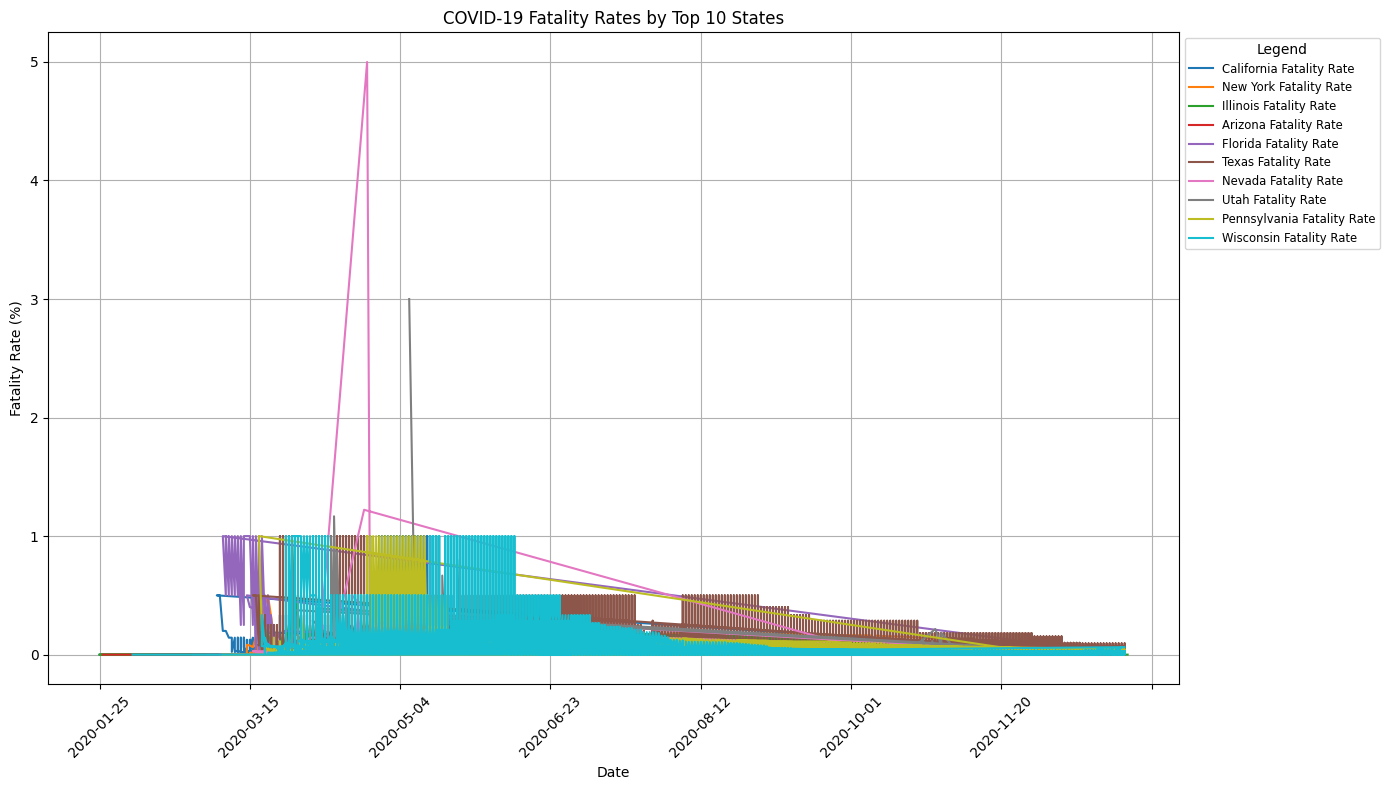

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame 'df'

# Count the number of unique states
num_states = df['state'].nunique()
print(f"There are {num_states} unique states in the dataset.")

# Limit the number of states for clarity (e.g., top 10 states by cases)
top_states = df.groupby('state')['cases'].max().nlargest(10).index

# Create a plot for fatality rates
plt.figure(figsize=(14, 8))

# Loop through each of the top states in the DataFrame
for state in top_states:
    df_state = df[df['state'] == state]

    # Plotting the fatality rate for each state
    plt.plot(df_state['date'], df_state['fatality_rate'], label=f'{state} Fatality Rate')

plt.title('COVID-19 Fatality Rates by Top 10 States')
plt.xlabel('Date')
plt.ylabel('Fatality Rate (%)')
plt.xticks(rotation=45)

# Adjusting the number of x-ticks for better readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8))

# Reduce legend size
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', title='Legend')
plt.grid()
plt.tight_layout()
plt.show()

Here I did three different linear regression tests where I yielded three different values for first only accounting for cases and deaths, then the month and day of year, and finally adding on the state, all of these working for the response variable which is fatality rate. The mean squared error indicates the accuracy of the prediction, with a smaller values indicating a lower chance of error. So all three models performed pretty well in that respect, with the mean squared error decreasing when adding in the variable "state". However, the r squared is not yielding significantly useful values, but it is slightly increasing as more variables are added in. This might indicate to researchers to look at other variables that might affect the response variable other than those in the data, such as total population, population density, or health care services that might be swaying the fatality rate more than these listed variables.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare the Data (Drop rows with NaN in either X or y)
df_clean = df[['cases', 'deaths', 'fatality_rate']].dropna()

# Step 2: Define Features (X) and Target (y)
X = df_clean[['cases', 'deaths']]
y = df_clean['fatality_rate']

# Step 3: Train-Test Split (Ensure consistent alignment)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Impute Missing Values in X (if needed)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 5: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train_imputed, y_train)  # Ensure consistent sizes here

# Step 6: Make Predictions
y_pred = model.predict(X_test_imputed)

# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.0187
R-squared: 0.0008


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Convert 'date' to datetime format and extract features
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear

# Step 2: Prepare the feature matrix (X) and target variable (y)
X = df[['cases', 'deaths', 'month', 'day_of_year']]
y = df['fatality_rate']

# Step 3: Drop rows with NaN in either X or y
df_clean = df[['cases', 'deaths', 'month', 'day_of_year', 'fatality_rate']].dropna()
X = df_clean[['cases', 'deaths', 'month', 'day_of_year']]
y = df_clean['fatality_rate']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Impute missing values in X (if any)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test_imputed)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.0187
R-squared: 0.0021


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Convert 'date' to datetime and extract time-based features
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear

# Step 2: One-hot encode the 'state' column
df_encoded = pd.get_dummies(df, columns=['state'], drop_first=True)

# Step 3: Prepare the feature matrix (X) and target variable (y)
X = df_encoded[['cases', 'deaths', 'month', 'day_of_year'] +
               [col for col in df_encoded.columns if col.startswith('state_')]]
y = df_encoded['fatality_rate']

# Step 4: Drop rows with NaN values
df_clean = df_encoded.dropna()
X = df_clean[X.columns]
y = df_clean['fatality_rate']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Impute missing values in X (if needed)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 7: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test_imputed)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.0185
R-squared: 0.0097


For each state, there is an analysis of how the fatality rate is different from the baseline. Through looking at the list, it seems that states that might need attention is Maryland with 0.1018 above the baseline. In terms of other indicators, the cases, deaths and day of year coefficents are all zeros, which means that they don't have any relationship with fatality rate. However, the month coefficent stands out, which is not a significant number but still worth looking it. This difference might be due to changes in weather, government policies, or vaccination rates. During winter, the virus might not be as active as during the summer. These are all things that deserve more investigations.

In [26]:
# Print the model's coefficients and intercept
feature_names = X.columns
coefficients = model.coef_

for feature, coef in zip(feature_names, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef:.4f}")

print(f"Intercept: {model.intercept_:.4f}")

Feature: cases, Coefficient: -0.0000
Feature: deaths, Coefficient: 0.0000
Feature: month, Coefficient: -0.0006
Feature: day_of_year, Coefficient: -0.0000
Feature: state_Alaska, Coefficient: -0.0177
Feature: state_Arizona, Coefficient: 0.0075
Feature: state_Arkansas, Coefficient: -0.0041
Feature: state_California, Coefficient: -0.0034
Feature: state_Colorado, Coefficient: 0.0027
Feature: state_Connecticut, Coefficient: 0.0336
Feature: state_Delaware, Coefficient: 0.0024
Feature: state_District of Columbia, Coefficient: 0.0146
Feature: state_Florida, Coefficient: 0.0027
Feature: state_Georgia, Coefficient: 0.0105
Feature: state_Guam, Coefficient: -0.0128
Feature: state_Hawaii, Coefficient: -0.0091
Feature: state_Idaho, Coefficient: -0.0095
Feature: state_Illinois, Coefficient: 0.0022
Feature: state_Indiana, Coefficient: 0.0157
Feature: state_Iowa, Coefficient: -0.0039
Feature: state_Kansas, Coefficient: -0.0067
Feature: state_Kentucky, Coefficient: -0.0006
Feature: state_Louisiana, Coeff